# 1. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv(
    "./data/서울특별시 공공자전거 이용정보(월별)_25.7-12.csv",
    encoding="CP949"
)

df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,NaN,20대,68,5353.58,51.93,224057.74,1849
1,202507,102,102. 망원역 1번출구 앞,일일권,NaN,30대,65,6345.95,54.21,233558.04,1773
2,202507,102,102. 망원역 1번출구 앞,일일권,NaN,40대,11,378.59,3.54,15314.12,122
3,202507,102,102. 망원역 1번출구 앞,일일권,NaN,50대,4,169.09,1.46,6287.07,100
4,202507,102,102. 망원역 1번출구 앞,일일권,NaN,60대,1,69.20,0.42,1820.25,9


# 2. 데이터 전처리

## 1) 데이터 정보 확인하기

In [2]:
df.info()
# 전체 개수에 맞지 않으면 결측치가 있는 것.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629975 entries, 0 to 629974
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     629975 non-null  int64  
 1   대여소번호    629975 non-null  int64  
 2   대여소명     629975 non-null  object 
 3   대여구분코드   629975 non-null  object 
 4   성별       437187 non-null  object 
 5   연령대코드    629975 non-null  object 
 6   이용건수     629975 non-null  int64  
 7   운동량      629392 non-null  float64
 8   탄소량      629392 non-null  float64
 9   이동거리(M)  629975 non-null  float64
 10  이용시간(분)  629975 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 52.9+ MB


In [3]:
# 데이터는 몇 개이고, 몇 개의 컬럼을 가졌나요?
nrow, ncol = df.shape
print(f"따릉이 데이터는 {nrow:,}개 이고, {ncol}개의 열이 있습니다.")

따릉이 데이터는 629,975개 이고, 11개의 열이 있습니다.


## 2. 데이터 형 변환

In [4]:
# 202507
pd.to_datetime(df["대여일자"], format="%Y%m")

0        2025-07-01
1        2025-07-01
2        2025-07-01
3        2025-07-01
4        2025-07-01
            ...    
629970   2025-12-01
629971   2025-12-01
629972   2025-12-01
629973   2025-12-01
629974   2025-12-01
Name: 대여일자, Length: 629975, dtype: datetime64[ns]

In [5]:
# 대여일자를 int가 아닌 str로 바꾸기.
df["대여일자"] = df["대여일자"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629975 entries, 0 to 629974
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     629975 non-null  object 
 1   대여소번호    629975 non-null  int64  
 2   대여소명     629975 non-null  object 
 3   대여구분코드   629975 non-null  object 
 4   성별       437187 non-null  object 
 5   연령대코드    629975 non-null  object 
 6   이용건수     629975 non-null  int64  
 7   운동량      629392 non-null  float64
 8   탄소량      629392 non-null  float64
 9   이동거리(M)  629975 non-null  float64
 10  이용시간(분)  629975 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 52.9+ MB


In [6]:
df.describe()

,대여소번호,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,629975.000000,629975.000000,629392.000000,629392.000000,6.299750e+05,629975.000000
mean,2441.959981,31.188101,1870.839147,16.197041,7.009736e+04,635.473514
std,1649.317268,58.754097,3495.652535,29.552364,1.279532e+05,1134.422807
min,102.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1018.000000,3.000000,195.637500,1.770000,7.638060e+03,71.000000
50%,2119.000000,11.000000,669.825000,6.000000,2.594360e+04,235.000000
75%,3956.000000,33.000000,2054.095000,18.100000,7.830514e+04,708.000000
max,6190.000000,2168.000000,155418.840000,1515.530000,6.598829e+06,54779.000000


In [7]:
df["대여소번호"] = df["대여소번호"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629975 entries, 0 to 629974
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     629975 non-null  object 
 1   대여소번호    629975 non-null  object 
 2   대여소명     629975 non-null  object 
 3   대여구분코드   629975 non-null  object 
 4   성별       437187 non-null  object 
 5   연령대코드    629975 non-null  object 
 6   이용건수     629975 non-null  int64  
 7   운동량      629392 non-null  float64
 8   탄소량      629392 non-null  float64
 9   이동거리(M)  629975 non-null  float64
 10  이용시간(분)  629975 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 52.9+ MB


## 3) 결측치 파악 및 처리

In [8]:
df.isna().sum()

대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         192788
연령대코드           0
이용건수            0
운동량           583
탄소량           583
이동거리(M)         0
이용시간(분)         0
dtype: int64

In [9]:
# 결측치가 왜 발생했을까? 
## 성별 - 결측치를 대체 ("Other")
## 운동량/탄소량 - 내 분석 목표에 큰 의미를 차지하지 않기 때문에 그냥 둔다.

In [10]:
# 성별 데이터 몇 개인지 파악하기
df["성별"].value_counts()

성별
M    233282
F    203831
m        50
f        24
Name: count, dtype: int64

In [11]:
# 다 대문자로 바꾸기
# 결측치를 "O"라고 대체하기
df["성별"] = df["성별"].str.upper()
df["성별"] = df["성별"].fillna("O")

df["성별"].value_counts()

성별
M    233332
F    203855
O    192788
Name: count, dtype: int64

## 4) 이상치 파악 및 정리

In [12]:
df.describe()

,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,629975.000000,629392.000000,629392.000000,6.299750e+05,629975.000000
mean,31.188101,1870.839147,16.197041,7.009736e+04,635.473514
std,58.754097,3495.652535,29.552364,1.279532e+05,1134.422807
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,3.000000,195.637500,1.770000,7.638060e+03,71.000000
50%,11.000000,669.825000,6.000000,2.594360e+04,235.000000
75%,33.000000,2054.095000,18.100000,7.830514e+04,708.000000
max,2168.000000,155418.840000,1515.530000,6.598829e+06,54779.000000


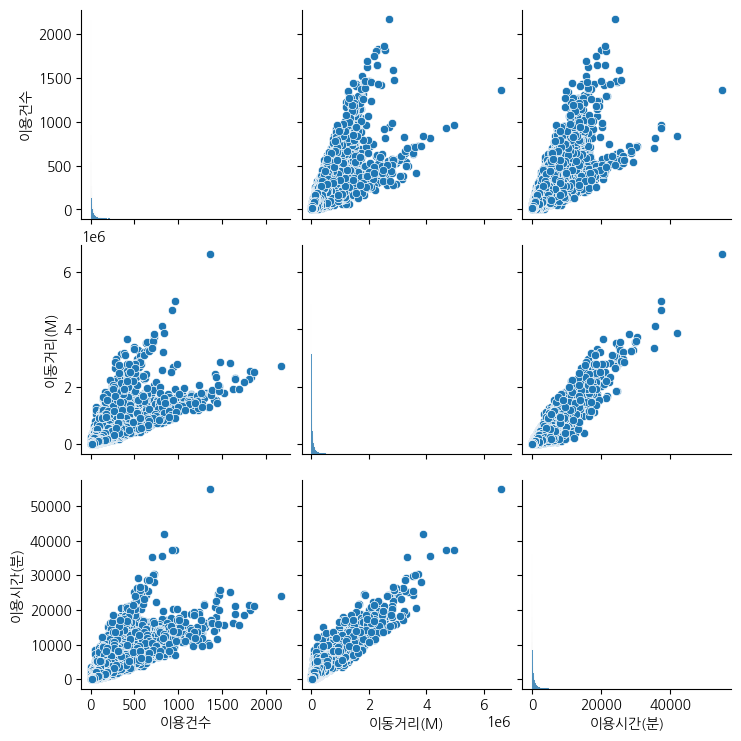

In [13]:
# pair plot
import koreanize_matplotlib # 한글 적용  # noqa: F401
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(
    df[["이용건수", "이동거리(M)", "이용시간(분)"]],
    diag_kind="hist"
)
plt.show()

In [14]:
# 정렬: sort_values(by=[], ascending=)
# 정렬 (이용건수 기준 내림차순 Top10)
df.sort_values(by="이용건수", ascending=False).head(10)


,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
276982,202509,2715,2715.마곡나루역 2번 출구,정기권,M,30대,2168,76889.56,624.19,2715682.23,23859
277453,202509,2728,2728.마곡나루역 3번 출구,정기권,M,30대,1865,71451.56,576.87,2510370.54,21061
64566,202507,2715,2715.마곡나루역 2번 출구,정기권,M,30대,1834,65265.70,529.31,2334817.28,20832
65013,202507,2728,2728.마곡나루역 3번 출구,정기권,M,30대,1814,70722.91,584.47,2549397.49,20055
169573,202508,2715,2715.마곡나루역 2번 출구,정기권,M,30대,1803,64036.40,520.28,2259446.80,21484
386004,202510,2715,2715.마곡나루역 2번 출구,정기권,M,30대,1754,61534.06,499.32,2167739.63,18508
495019,202511,2728,2728.마곡나루역 3번 출구,정기권,M,30대,1696,55766.71,447.41,1935361.44,15692
276974,202509,2715,2715.마곡나루역 2번 출구,정기권,F,30대,1650,52725.48,521.68,2275567.17,21203
170019,202508,2728,2728.마곡나루역 3번 출구,정기권,M,30대,1649,64933.22,529.69,2293112.91,18931
494573,202511,2715,2715.마곡나루역 2번 출구,정기권,M,30대,1626,55754.03,446.61,1931219.79,16138


In [15]:
# 정렬 (이동거리(M) 기준 내림차순 Top10)
df.sort_values(by="이동거리(M)", ascending=False).head(10)


,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
315718,202509,5515,5515.한강버스 망원 선착장,일일권,F,20대,1358,155418.84,1515.53,6598829.21,54779
315726,202509,5515,5515.한강버스 망원 선착장,일일권,M,20대,960,135447.46,1141.03,4967456.01,37136
424920,202510,5515,5515.한강버스 망원 선착장,일일권,F,20대,926,111709.99,1082.67,4678027.57,37241
314071,202509,5153,5153.한강버스 뚝섬 선착장,일일권,F,20대,813,97350.27,948.21,4116458.49,35587
535551,202511,5891,5891.한강버스 여의도 선착장,일일권(비회원),O,기타,833,98914.83,891.63,3882057.34,41836
315711,202509,5515,5515.한강버스 망원 선착장,일일권,O,20대,722,93338.95,880.59,3824483.13,27903
83807,202507,4217,4217. 한강공원 망원나들목,일일권,F,20대,726,88431.04,860.74,3711720.19,30388
425041,202510,5651,5651.한강버스 옥수 선착장,정기권,M,50대,416,103360.19,838.68,3643277.08,20476
223331,202509,502,502. 자양(뚝섬한강공원)역 1번출구 앞,일일권,F,20대,707,85000.21,832.74,3589150.05,30090
205726,202508,5153,5153.한강버스 뚝섬 선착장,일일권,M,20대,647,97167.37,819.09,3551873.47,25520


In [16]:
# 정렬 (이용시간(분) 기준 내림차순 Top10)
df.sort_values(by="이용시간(분)", ascending=False).head(10)


,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
315718,202509,5515,5515.한강버스 망원 선착장,일일권,F,20대,1358,155418.84,1515.53,6598829.21,54779
535551,202511,5891,5891.한강버스 여의도 선착장,일일권(비회원),O,기타,833,98914.83,891.63,3882057.34,41836
424920,202510,5515,5515.한강버스 망원 선착장,일일권,F,20대,926,111709.99,1082.67,4678027.57,37241
315726,202509,5515,5515.한강버스 망원 선착장,일일권,M,20대,960,135447.46,1141.03,4967456.01,37136
314071,202509,5153,5153.한강버스 뚝섬 선착장,일일권,F,20대,813,97350.27,948.21,4116458.49,35587
427421,202510,5891,5891.한강버스 여의도 선착장,일일권(비회원),O,기타,704,85522.48,770.99,3330263.54,35131
83807,202507,4217,4217. 한강공원 망원나들목,일일권,F,20대,726,88431.04,860.74,3711720.19,30388
223331,202509,502,502. 자양(뚝섬한강공원)역 1번출구 앞,일일권,F,20대,707,85000.21,832.74,3589150.05,30090
205719,202508,5153,5153.한강버스 뚝섬 선착장,일일권,F,20대,708,82830.75,809.11,3537991.64,29695
107627,202508,207,207. 여의나루역 1번출구 앞,일일권,F,20대,541,77368.62,753.61,3285101.91,29082


In [17]:
# 이상치가 정말로 이상한가?
##  이용건수가 남들보다 많은 사람이 더 큰 값을 가졌다.
## 건당 이동거리, 건당 이용시간 필요.

## 5) 파생변수 생성

In [18]:
df["건당 이동거리(M)"] = df["이동거리(M)"] / df["이용건수"]
df["건당 이용시간(분)"] = df["이용시간(분)"] / df["이용건수"]

In [19]:
df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176
1,202507,102,102. 망원역 1번출구 앞,일일권,O,30대,65,6345.95,54.21,233558.04,1773,3593.200615,27.276923
2,202507,102,102. 망원역 1번출구 앞,일일권,O,40대,11,378.59,3.54,15314.12,122,1392.192727,11.090909
3,202507,102,102. 망원역 1번출구 앞,일일권,O,50대,4,169.09,1.46,6287.07,100,1571.767500,25.000000
4,202507,102,102. 망원역 1번출구 앞,일일권,O,60대,1,69.20,0.42,1820.25,9,1820.250000,9.000000


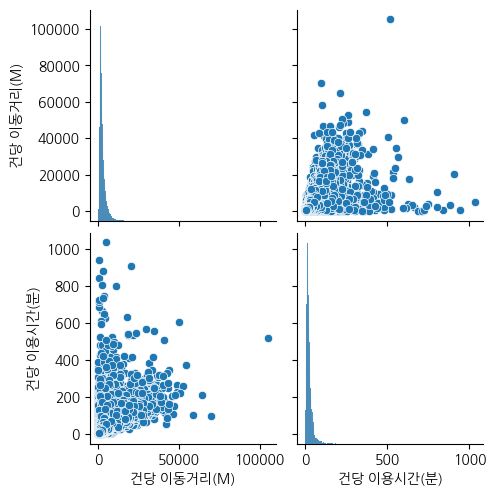

In [20]:
# 건당 이동거리, 건당 이용시간의 히스토그램 그려보기
sns.pairplot(
    df[["건당 이동거리(M)", "건당 이용시간(분)"]],
    diag_kind="hist"
)
plt.show()

### (2) 전처리 데이터 저장

In [21]:
df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176
1,202507,102,102. 망원역 1번출구 앞,일일권,O,30대,65,6345.95,54.21,233558.04,1773,3593.200615,27.276923
2,202507,102,102. 망원역 1번출구 앞,일일권,O,40대,11,378.59,3.54,15314.12,122,1392.192727,11.090909
3,202507,102,102. 망원역 1번출구 앞,일일권,O,50대,4,169.09,1.46,6287.07,100,1571.767500,25.000000
4,202507,102,102. 망원역 1번출구 앞,일일권,O,60대,1,69.20,0.42,1820.25,9,1820.250000,9.000000


In [22]:
df.to_csv(
    "./data/따릉이_월별정보_전처리_데이터(25_7_12).csv",
    index=False
)

# 3. 데이터 탐색하기

In [23]:
df_2 = pd.read_csv("./data/따릉이_월별정보_전처리_데이터(25_7_12).csv")
df_2.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176
1,202507,102,102. 망원역 1번출구 앞,일일권,O,30대,65,6345.95,54.21,233558.04,1773,3593.200615,27.276923
2,202507,102,102. 망원역 1번출구 앞,일일권,O,40대,11,378.59,3.54,15314.12,122,1392.192727,11.090909
3,202507,102,102. 망원역 1번출구 앞,일일권,O,50대,4,169.09,1.46,6287.07,100,1571.767500,25.000000
4,202507,102,102. 망원역 1번출구 앞,일일권,O,60대,1,69.20,0.42,1820.25,9,1820.250000,9.000000


## 1) 변수별로 특징 파악하기

In [24]:
# 대여일자, 몇 월에 가장 많이 따릉이가 이용되었을까?
month_summary = df["대여일자"].value_counts()
month_summary

대여일자
202510    109286
202509    108768
202511    108310
202508    106089
202507    104205
202512     93317
Name: count, dtype: int64

In [25]:
plt.figure(figsize=(3,3))


<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [2]:
# 대여소, 사람들이 가장 많이 이용하는 대여소는 어디일까?
# df.groupby("대여소")["이용건수"].sum()

In [27]:
# 대여구분코드, 사람들은 어떤 유형의 대여를 하는가?

In [28]:
# 성별, 성별 분포는 어떻게 이루어져 있는가?

In [29]:
# 연령대, 연령대 분포는 어떻게 이루어져 있는가?

In [30]:
# 건당 이동거리, 건당 이동거리 분포는 어떤가?

In [31]:
# 건당 이용시간, 건당 이용시간 분포는 어떤가?

## 2) 그룹별로 특징 파악하기

In [32]:
df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176
1,202507,102,102. 망원역 1번출구 앞,일일권,O,30대,65,6345.95,54.21,233558.04,1773,3593.200615,27.276923
2,202507,102,102. 망원역 1번출구 앞,일일권,O,40대,11,378.59,3.54,15314.12,122,1392.192727,11.090909
3,202507,102,102. 망원역 1번출구 앞,일일권,O,50대,4,169.09,1.46,6287.07,100,1571.767500,25.000000
4,202507,102,102. 망원역 1번출구 앞,일일권,O,60대,1,69.20,0.42,1820.25,9,1820.250000,9.000000


In [33]:
# 월별로 이동거리에 차이가 있는가?
month_dist_summary = df.groupby("대여일자")["건당 이동거리(M)"].mean()
month_dist_summary


대여일자
202507    2749.875730
202508    2868.200003
202509    2942.314524
202510    2913.222629
202511    2756.153245
202512    2309.192061
Name: 건당 이동거리(M), dtype: float64

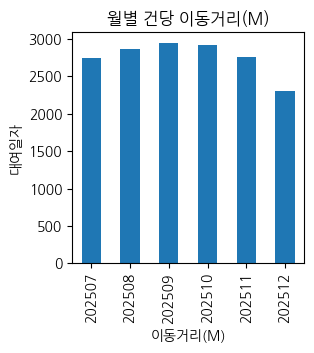

In [34]:
plt.figure(figsize=(3,3))
month_dist_summary.plot(kind="bar")
plt.title("월별 건당 이동거리(M)")
plt.xlabel("이동거리(M)")
plt.ylabel("대여일자")
plt.show()

In [35]:
# 대여소별로 이동거리에 차이가 있는가?
location_dist_summary = df.groupby("대여소명")["건당 이동거리(M)"].mean()
location_dist_summary

대여소명
1001. 광진교 남단 사거리(천호공원 방면)    2726.918058
1002. 해공공원(천호동)              2991.068123
1003. 해공도서관앞                 2558.549457
1004. 삼성광나루아파트 버스정류장         3403.016935
1006. 롯데캐슬 115동앞             2498.283701
                                ...     
992.북한산입구 정류장                4047.661188
993.은평뉴타운 은뜨락아파트앞            2135.419299
994.북한산생태공원입구(교통섬)           2161.537279
995.은평다목적체육관                 2075.694719
996.응암역2번출구 국민은행 앞           3713.858238
Name: 건당 이동거리(M), Length: 2795, dtype: float64

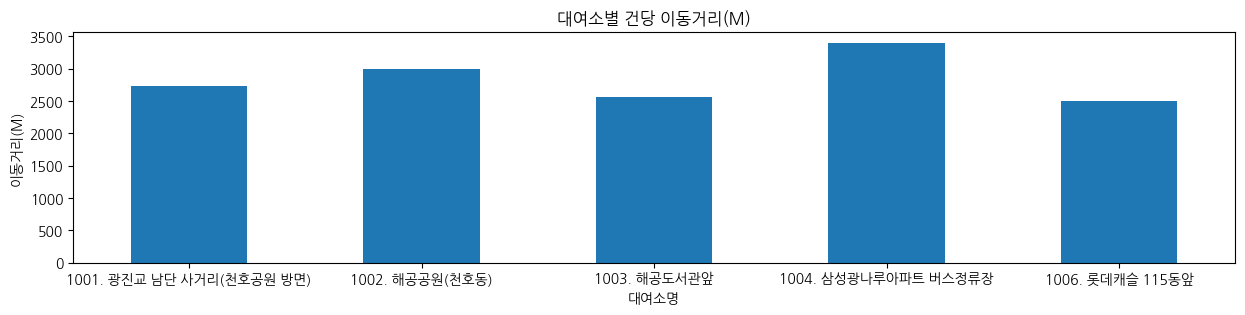

In [36]:
plt.figure(figsize=(15,3))
location_dist_summary.head().plot(kind="bar")
plt.title("대여소별 건당 이동거리(M)")
plt.xlabel("대여소명")
plt.xticks(rotation=0)
plt.ylabel("이동거리(M)")
plt.show()

In [37]:
# 연령대별로 이동거리에 차이가 있는가?

In [38]:
# 

## 3) 변수별 관계 파악하기 

In [39]:
df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176
1,202507,102,102. 망원역 1번출구 앞,일일권,O,30대,65,6345.95,54.21,233558.04,1773,3593.200615,27.276923
2,202507,102,102. 망원역 1번출구 앞,일일권,O,40대,11,378.59,3.54,15314.12,122,1392.192727,11.090909
3,202507,102,102. 망원역 1번출구 앞,일일권,O,50대,4,169.09,1.46,6287.07,100,1571.767500,25.000000
4,202507,102,102. 망원역 1번출구 앞,일일권,O,60대,1,69.20,0.42,1820.25,9,1820.250000,9.000000


In [40]:
# 연령대 X 성별 분포에 따른 건당 이용시간
pivot_table = df.pivot_table(
    values="건당 이용시간(분)",
    index="성별",
    columns="연령대코드",
    aggfunc="mean"
)

pivot_table

연령대코드,20대,30대,40대,50대,60대,70대이상,~10대,기타
성별,,,,,,,,
F,22.656268,24.574944,28.134423,27.778702,29.448522,27.155779,27.980463,24.503866
M,21.117935,22.506292,25.325559,25.395875,25.745202,26.948682,25.560062,22.222257
O,21.068815,22.234462,25.013122,25.102036,23.453969,22.748496,31.201627,30.790272


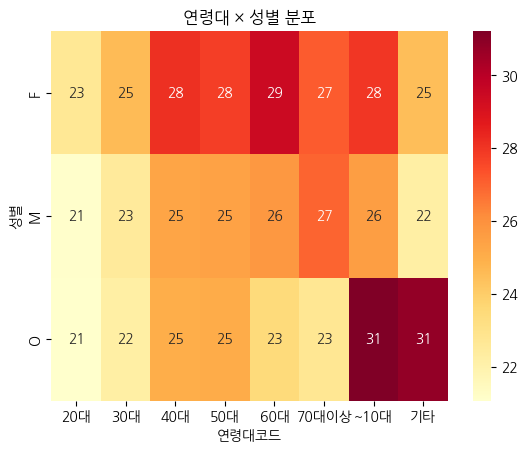

In [41]:
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd"
)
plt.title("연령대 × 성별 분포")
plt.show()

In [42]:
# 여성의 경우에는 다양한 연령대가 이용하는 것 같은데
# 남성의 경우에는 어르신들이 유독 많이 이용하는 것 같다.

In [43]:
# 대여일자 X 연령대에 따른 건당 이용시간
pivot_table = df.pivot_table(
    values="건당 이용시간(분)",
    index="대여일자",
    columns="연령대코드",
    aggfunc="mean"
)

pivot_table

연령대코드,20대,30대,40대,50대,60대,70대이상,~10대,기타
대여일자,,,,,,,,
202507,21.151339,22.143897,25.064165,25.436901,25.364987,25.346086,25.744064,26.035353
202508,21.948600,23.189708,26.408569,26.571122,26.405352,25.648969,27.735078,26.927921
202509,22.488309,24.060738,27.462252,26.911386,27.363389,27.759945,27.397647,27.779046
202510,21.847632,23.743359,27.531723,27.606553,27.882871,26.688678,29.384888,27.579628
202511,22.587831,24.531321,27.583154,26.532879,25.943915,26.043652,27.528855,26.732153
202512,19.516961,20.726067,22.411485,22.901468,23.229050,23.877426,23.448130,23.250335


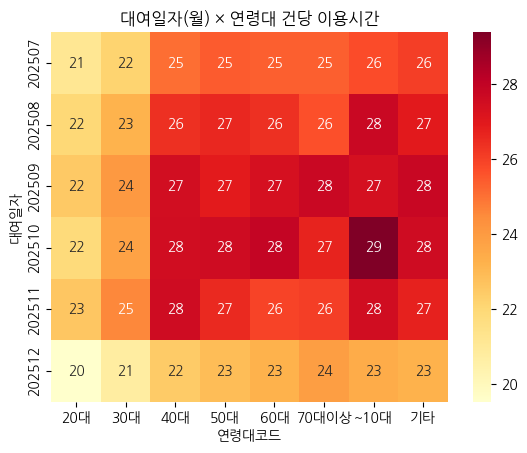

In [44]:
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd"
)
plt.title("대여일자(월) × 연령대 건당 이용시간")
plt.show()

In [45]:
# 대여소명 X 연령대에 따른 건당 이용시간
pivot_table = df.pivot_table(
    values="건당 이용시간(분)",
    index="대여소명",
    columns="연령대코드",
    aggfunc="mean"
)

pivot_table.head()

연령대코드,20대,30대,40대,50대,60대,70대이상,~10대,기타
대여소명,,,,,,,,
1001. 광진교 남단 사거리(천호공원 방면),25.079897,25.723694,30.423371,26.811757,20.509439,35.396528,18.691927,27.046220
1002. 해공공원(천호동),23.919650,22.929255,27.949342,36.833469,21.462379,35.347752,31.453289,30.435476
1003. 해공도서관앞,18.140473,21.282995,29.819945,27.211827,19.376358,38.545149,26.931285,28.562114
1004. 삼성광나루아파트 버스정류장,27.084993,28.601041,36.440187,30.288014,29.082775,45.609954,38.157988,24.847137
1006. 롯데캐슬 115동앞,20.489812,18.898723,28.566328,22.333152,13.293750,7.000000,13.387680,19.623006


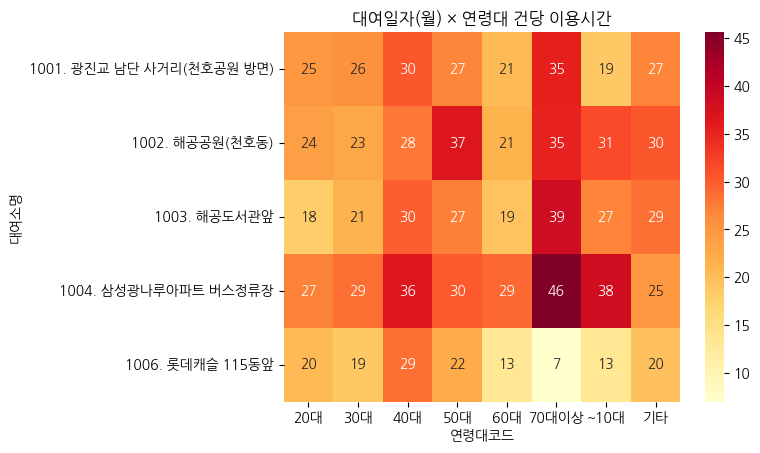

In [46]:
sns.heatmap(
    pivot_table.head(),
    annot=True,
    fmt=".0f",
    cmap="YlOrRd"
)
plt.title("대여일자(월) × 연령대 건당 이용시간")
plt.show()

# 4. 지도 시각화 실습

In [47]:
df_2.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176
1,202507,102,102. 망원역 1번출구 앞,일일권,O,30대,65,6345.95,54.21,233558.04,1773,3593.200615,27.276923
2,202507,102,102. 망원역 1번출구 앞,일일권,O,40대,11,378.59,3.54,15314.12,122,1392.192727,11.090909
3,202507,102,102. 망원역 1번출구 앞,일일권,O,50대,4,169.09,1.46,6287.07,100,1571.767500,25.000000
4,202507,102,102. 망원역 1번출구 앞,일일권,O,60대,1,69.20,0.42,1820.25,9,1820.250000,9.000000


In [48]:
# 공공자전거 대여소 정보.csv 불러오기
import pandas as pd

loc_df = pd.read_csv(
    "./data/공공자전거 대여소 정보.csv"
)
loc_df.head()

,STA_LOC,RENT_ID,RENT_NO,RENT_NM,RENT_ID_NM,HOLD_NUM,STA_ADD1,STA_ADD2,STA_LAT,STA_LONG,START_INDEX,END_INDEX,RNUM
0,마포구,ST-10,108,서교동 사거리,108. 서교동 사거리,12.0,서울특별시 마포구 양화로 93,427,37.552746,126.918617,0,0,1
1,광진구,ST-100,503,더샵스타시티 C동 앞,503. 더샵스타시티 C동 앞,15.0,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.536667,127.073593,0,0,2
2,양천구,ST-1000,729,서부식자재마트 건너편,729. 서부식자재마트 건너편,10.0,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798,0,0,3
3,양천구,ST-1002,731,서울시 도로환경관리센터,731. 서울시 도로환경관리센터,10.0,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.529900,126.876541,0,0,4
4,양천구,ST-1003,732,신월중학교,732. 신월중학교,10.0,서울특별시 양천구 화곡로 59,신월동 이마트,37.539551,126.828300,0,0,5


In [49]:
# 어떤 데이터를 지도에 그릴 것인가?
# 대여소별로 건당 이동거리(M) - 2) 그룹별 요약
loc_dist_summary_top_5 = df_2.groupby("대여소명")["건당 이동거리(M)"].mean().sort_values(ascending=False).head()
loc_dist_summary_top_5

대여소명
1827. 독산보도육교 앞 자전거 보관소     8558.437961
1858. 500번,507번 버스 종점 앞    8193.087349
5651.한강버스 옥수 선착장           7683.493071
2037. 동작역 5번출구 동작주차공원      7654.498967
4940.한강버스 압구정 선착장          7395.968325
Name: 건당 이동거리(M), dtype: float64

In [50]:
loc_dist_summary_top_5 = loc_dist_summary_top_5.reset_index()
loc_dist_summary_top_5

,대여소명,건당 이동거리(M)
0,1827. 독산보도육교 앞 자전거 보관소,8558.437961
1,"1858. 500번,507번 버스 종점 앞",8193.087349
2,5651.한강버스 옥수 선착장,7683.493071
3,2037. 동작역 5번출구 동작주차공원,7654.498967
4,4940.한강버스 압구정 선착장,7395.968325


In [51]:
# 필요한 열만 추출. RENT_ID_NM, STA_LAT, STA_LONG
loc_df_new = loc_df[["RENT_ID_NM", "STA_LAT", "STA_LONG"]]
loc_df_new.columns = ["대여소명", "LAT", "LONG"]
loc_df_new

merge_data = pd.merge(
    left=loc_dist_summary_top_5, 
    right=loc_df_new,              # 
    how="left",                    # 취합방법(left, right, inner, outer)
    on="대여소명"                   # 
)
merge_data


,대여소명,건당 이동거리(M),LAT,LONG
0,1827. 독산보도육교 앞 자전거 보관소,8558.437961,37.456726,126.893066
1,"1858. 500번,507번 버스 종점 앞",8193.087349,37.437271,126.902687
2,5651.한강버스 옥수 선착장,7683.493071,37.539707,127.017899
3,2037. 동작역 5번출구 동작주차공원,7654.498967,37.503189,126.977150
4,4940.한강버스 압구정 선착장,7395.968325,37.526432,127.017204


In [52]:
import folium

center = [37.5057138, 127.1070689]
map = folium.Map(location=center, zoom_start=12)
map

In [53]:
# 한 행식 출력.
for idx in range(len(merge_data)):
    print(idx)
    # merge_data에서 idx위치에 있는 모든 열의 값을 출력.
    row_data =merge_data.iloc[idx,:].values
    print(row_data)
    loc = row_data[0]
    lat = row_data[-2]
    long = row_data[-1]
    print(loc, lat, long)
    print("="*30)

    # 지도 그리기
    folium.Marker(
        location=[lat, long],
        icon=folium.Icon(color="blue", icon="heart"),
        popup=loc
    ).add_to(map)


0
['1827. 독산보도육교 앞 자전거 보관소' np.float64(8558.437960748619)
 np.float64(37.45672607) np.float64(126.89306641)]
1827. 독산보도육교 앞 자전거 보관소 37.45672607 126.89306641
1
['1858. 500번,507번 버스 종점 앞' np.float64(8193.0873489451)
 np.float64(37.43727112) np.float64(126.90268707)]
1858. 500번,507번 버스 종점 앞 37.43727112 126.90268707
2
['5651.한강버스 옥수 선착장' np.float64(7683.493070511286) np.float64(37.53970718)
 np.float64(127.01789856)]
5651.한강버스 옥수 선착장 37.53970718 127.01789856
3
['2037. 동작역 5번출구 동작주차공원' np.float64(7654.498967120714)
 np.float64(37.50318909) np.float64(126.97714996)]
2037. 동작역 5번출구 동작주차공원 37.50318909 126.97714996
4
['4940.한강버스 압구정 선착장' np.float64(7395.968325458602) np.float64(37.52643204)
 np.float64(127.01720428)]
4940.한강버스 압구정 선착장 37.52643204 127.01720428


In [71]:
map

In [55]:
# 반복문을 통해서 대여소명, 평균 건당 이동거리(M), 위도, 경도 출력하기
## 반복 변수 : loc
for loc in loc_dist_summary_top_5.index:
    print(loc)

0
1
2
3
4


In [ ]:
# loc_df에서 REND_ID_NM이 loc인 STA_LAT, STA_LONG을 출력.
# loc_df.loc[ 조건, ["STA_LAT", "STA_LONG"]]
# 조건 : loc_df["REND_ID_NM"] == loc
# loc_df.loc[]
# for loc in loc_dist_summary_top_5.index:
#     print(loc)
#     temp = loc_df.loc[loc_df["RENT_ID_NM"] == loc, ["STA_LAT", "STA_LONG"]]
#     lat = loc_df.loc[loc_df["RENT_ID_NM"] == loc, "STA_LAT"].values[0]
#     long = loc_df.loc[loc_df["RENT_ID_NM"] == loc, "STA_LONG"].values[0]
#     print(lat, long)


대여소명
건당 이동거리(M)


## 2) 지도 그려보기

In [ ]:
# uv add folium
import folium

center = [37.5057138, 127.1070689]
map = folium.Map(location=center, zoom_start=12)
map

In [ ]:
folium.Marker(
    location=center,
    icon=folium.Icon(color="red", icon="off"),
    popup="서울"
).add_to(map)
map

# 지도에 Marker로 표시하고 싶을 때에는 location, popup에 넣을 데이터가 필요.

In [78]:
# for loc in loc_dist_summary_top_5.index:
#     print(loc)
#     temp = loc_df.loc[loc_df["RENT_ID_NM"] == loc, ["STA_LAT", "STA_LONG"]]
#     lat = loc_df.loc[loc_df["RENT_ID_NM"] == loc, "STA_LAT"].values[0]
#     long = loc_df.loc[loc_df["RENT_ID_NM"] == loc, "STA_LONG"].values[0]
#     print(lat, long)

#     # 지도 그리기
#     folium.Marker(
#         location=[lat, long],
#         icon=folium.Icon(color="red", icon="heart"),
#         popup=loc
#     ).add_to(map)


In [77]:
map